In [ ]:
# Use this code if using Colab to run Selenium

# Make sure to go to Runtime -> Change runtime and set GPU as hardware accelerator

# !kill -9 -1 # Use this line to delete this VM and start a new one. 
# The above line deletes all files and folders from the current VM and allocates a new one.

#Selenium is an open-source tool that automates web browsers.
!pip install selenium
!apt-get -q update   #Used to handle installation and removal of softwares and libraries
!apt install -yq chromium-chromedriver #ChromeDriver is a separate executable that Selenium WebDriver uses to control Chrome.
!cp /usr/lib/chromium-browser/chromedriver /usr/bin

import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
from selenium import webdriver 
#WebDriver is a browser automation framework that works with open source APIs. 
#The framework operates by accepting commands, sending those commands to a browser, and interacting with applications.
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')

     |████████████████████████████████| 904 kB 5.3 MB/s 
Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [696 B]
Get:6 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelea

In [ ]:
wd = webdriver.Chrome('chromedriver',options=chrome_options)

wd.get("https://www.example.com")
print(wd.page_source)

<html><head>
    <title>Example Domain</title>

    <meta charset="utf-8">
    <meta http-equiv="Content-type" content="text/html; charset=utf-8">
    <meta name="viewport" content="width=device-width, initial-scale=1">
    <style type="text/css">
    body {
        background-color: #f0f0f2;
        margin: 0;
        padding: 0;
        font-family: -apple-system, system-ui, BlinkMacSystemFont, "Segoe UI", "Open Sans", "Helvetica Neue", Helvetica, Arial, sans-serif;
        
    }
    div {
        width: 600px;
        margin: 5em auto;
        padding: 2em;
        background-color: #fdfdff;
        border-radius: 0.5em;
        box-shadow: 2px 3px 7px 2px rgba(0,0,0,0.02);
    }
    a:link, a:visited {
        color: #38488f;
        text-decoration: none;
    }
    @media (max-width: 700px) {
        div {
            margin: 0 auto;
            width: auto;
        }
    }
    </style>    
</head>

<body>
<div>
    <h1>Example Domain</h1>
    <p>This domain is for use in illustr

In [ ]:
# Source: https://towardsdatascience.com/web-scraping-using-selenium-python-8a60f4cf40ab
wd.get('https://forums.edmunds.com/discussion/50806/general/x/car-subscription-vs-lease-vs-purchase')
#print(wd.page_source)

In [ ]:
# https://www.guru99.com/xpath-selenium.html
# Understand absolute and relative xpaths in Selenium

In [ ]:
user_message = wd.find_elements_by_xpath('/html/body/div[1]/div[1]/div[2]/div/div/div/div/div[3]/main/div[4]/div[1]/ul/li[2]/div/div[3]/div/div[1]')[0] # try relative xpath 
comment = user_message.text
print(comment)

I hadn't thought about being forced into another insurance company, so that's a consideration.


In [ ]:
userid=wd.find_elements_by_xpath('//*[@id="Comment_5482782"]/div/div[2]/div[1]/span[1]/a[2]')[0] #/html/body/div[1]/div[1]/div[2]/div/div/div/div/div[3]/main/div[3]/div[2]/div/div[1]/div[1]/span[1]/a[2]
userid = userid.text

print(userid)

Mr_Shiftright


In [ ]:
time_element = wd.find_elements_by_xpath('//*[@id="Comment_5482782"]/div/div[2]/div[2]/span/a/time')[0]
time = time_element.text
date = time_element.get_attribute('title')

print(date)
print(time)

April 7, 2018 11:38AM
April 2018


In [ ]:
import pandas as pd
df = pd.DataFrame(columns=['username', 'date', 'comment'])
df.loc[0, 'username'] = userid
df.loc[0, 'date'] = date
df.loc[0, 'comment'] = comment

df.index.name = "ID"
df.head()

,username,date,comment
ID,,,
0,Mr_Shiftright,"April 7, 2018 11:38AM",I hadn't thought about being forced into anoth...


In [ ]:
df.to_csv("results.csv", sep="\t")
!ls
from google.colab import files
files.download("results.csv")

NameError: ignored

In [ ]:
wd.get('https://forums.edmunds.com/discussion/50806/general/x/car-subscription-vs-lease-vs-purchase')

comments = pd.DataFrame(columns = ['Date','user_id','comments']) 
ids = wd.find_elements_by_xpath("//*[contains(@id,'Comment_')]")

comment_ids = []
for i in ids:
  comment_ids.append(i.get_attribute('id'))
\

for x in comment_ids:
    #Extract dates from for each user on a page
    user_date = wd.find_elements_by_xpath('//*[@id="' + x +'"]/div/div[2]/div[2]/span[1]/a/time')[0]
    date = user_date.get_attribute('title')

    #Extract user ids from each user on a page
    userid_element = wd.find_elements_by_xpath('//*[@id="' + x +'"]/div/div[2]/div[1]/span[1]/a[2]')[0]
    userid = userid_element.text

    #Extract Message for each user on a page
    user_message = wd.find_elements_by_xpath('//*[@id="' + x +'"]/div/div[3]/div/div[1]')[0]
    comment = user_message.text
                                   
    #Adding date, userid and comment for each user in a dataframe    
    comments.loc[len(comments)] = [date,userid,comment]
  
print(comments)
print(comments.shape[0])


count_volvo = 0
for i in range((comments.shape[0])): 
  if ('Volvo' in comments.loc[i,'comments']) | ('volvo' in comments.loc[i,'comments']) :
      count_volvo += 1

print(count_volvo)

                         Date  ...                                           comments
0       April 7, 2018 11:15AM  ...  Zero interest in the car subscription idea.  I...
1       April 7, 2018 11:38AM  ...  I hadn't thought about being forced into anoth...
2        April 7, 2018 1:37PM  ...  Also here in PA tax is on the monthly payment....
3       April 20, 2018 7:11AM  ...  I don't see what the consumer gains in this ar...
4       April 20, 2018 8:47AM  ...  price aside, it is the convenience they are se...
5       April 20, 2018 9:28AM  ...  stickguy said:\nprice aside, it is the conveni...
6      April 20, 2018 12:04PM  ...  I just cannot imagine, even if I hit the power...
7       April 21, 2018 2:36PM  ...  My prediction for what it's worth is this will...
8          May 3, 2018 8:02AM  ...  I think it can work... for the right price.\n\...
9         May 3, 2018 10:24AM  ...  It's like trading in to the dealer vs. selling...
10        May 3, 2018 10:34AM  ...  If the price is ri

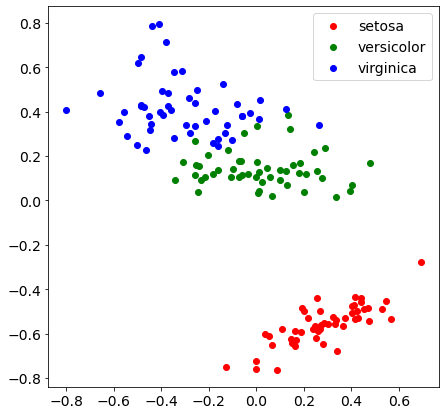

In [ ]:
# Source: https://towardsdatascience.com/visualize-multidimensional-datasets-with-mds-64d7b4c16eaa

#What is MDS?
# MDS (multidimensional scaling) is an algorithm that transforms a dataset into another dataset, usually with lower dimensions, keeping the same euclidean distances between the points.
# Keeping the distances is a very useful feature of MDS because it allows us to reasonably preserve patterns and clusters
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.manifold import MDS
from sklearn.preprocessing import MinMaxScaler

# load the Iris dataset.
data = load_iris()
X = data.data

#We now perform a 0–1 scaling with MinMaxScaler
#Transform features by scaling each feature to a given range.
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

#we apply the MDS procedure to get a 2-dimensional dataset
mds = MDS(2,random_state=0)
X_2d = mds.fit_transform(X_scaled)

colors = ['red','green','blue']
plt.rcParams['figure.figsize'] = [7, 7]
plt.rc('font', size=14)
# print(data.target)
for i in np.unique(data.target):
  subset = X_2d[data.target == i]
  x = [row[0] for row in subset]
  y = [row[1] for row in subset]
  plt.scatter(x,y,c=colors[i],label=data.target_names[i])
plt.legend()
plt.show()

#helpful links - http://statweb.stanford.edu/~jtaylo/courses/stats202/mds.html
#mds documentation - https://scikit-learn.org/stable/modules/generated/sklearn.manifold.MDS.html
#minmaxscaler documentation - https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html 
